In [1]:
#Import Libraries

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
import matplotlib.pyplot as plt


#Dataset

In [2]:
# Load the CIFAR-10 dataset

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Pixel normalization
x_train, x_test = x_train / 255.0, x_test / 255.0

170498071/170498071 [==============================] - 2s 0us/step


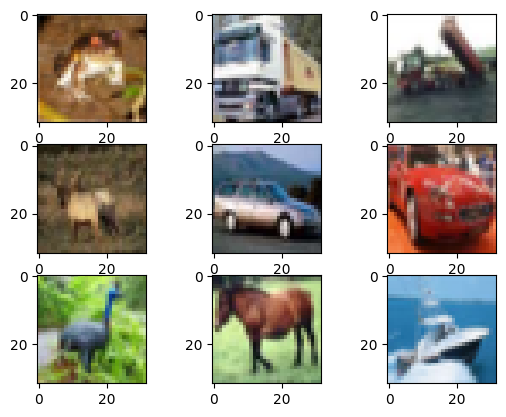

In [5]:
# Plot first few images

for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i])
plt.show()


#Model Development

#KNN

In [9]:
# Flatten data to 1D array

x_train_flattened = x_train.reshape(x_train.shape[0], 32 * 32 * 3)
x_test_flattened = x_test.reshape(x_test.shape[0], 32 * 32 * 3)


In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

x_train_small, _, y_train_small, _ = train_test_split(x_train_flattened, y_train, test_size=0.9, random_state=42)

# Build KNN model
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(x_train_small, y_train_small.ravel())


KNeighborsClassifier(n_neighbors=3)

In [11]:
# Evaluate the model

accuracy = knn.score(x_test_flattened, y_test.ravel())
print(f"Accuracy: {accuracy}")


Accuracy: 0.2586


#SVM

In [13]:
# Normalize the data

x_train_flattened = x_train_flattened.astype('float32') / 255.0
x_test_flattened = x_test_flattened.astype('float32') / 255.0

In [14]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

x_train_small, _, y_train_small, _ = train_test_split(x_train_flattened, y_train, test_size=0.9, random_state=42)

# Build SVM model
svm_model = SVC(kernel='linear')

# Train the model
svm_model.fit(x_train_small, y_train_small.ravel())

SVC(kernel='linear')

In [15]:
# Evaluate the model

accuracy = svm_model.score(x_test_flattened, y_test.ravel())
print(f"Test Accuracy: {accuracy}")

Test Accuracy: 0.1192


#Deep Learning- CNN

In [4]:
# Build Model - Convolutional Neural Network (CNN)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [6]:
# Train the model

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 37s 23ms/step - loss: 1.4552 - accuracy: 0.4772 - val_loss: 1.3818 - val_accuracy: 0.5342
Epoch 2/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.1026 - accuracy: 0.6162 - val_loss: 1.0253 - val_accuracy: 0.6525
Epoch 3/10
1563/1563 [==============================] - 35s 23ms/step - loss: 0.9735 - accuracy: 0.6606 - val_loss: 0.9531 - val_accuracy: 0.6747
Epoch 4/10
1563/1563 [==============================] - 35s 23ms/step - loss: 0.8889 - accuracy: 0.6921 - val_loss: 0.9962 - val_accuracy: 0.6571
Epoch 5/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.8254 - accuracy: 0.7125 - val_loss: 0.9334 - val_accuracy: 0.6770
Epoch 6/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.7722 - accuracy: 0.7297 - val_loss: 0.9214 - val_accuracy: 0.6852
Epoch 7/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.7221 - accuracy: 0.7491 - val_loss: 0.9628 -

In [7]:
# Evaluate the model

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print('\nTest accuracy:', test_acc)


313/313 - 2s - loss: 0.9068 - accuracy: 0.7083 - 2s/epoch - 6ms/step

Test accuracy: 0.708299994468689


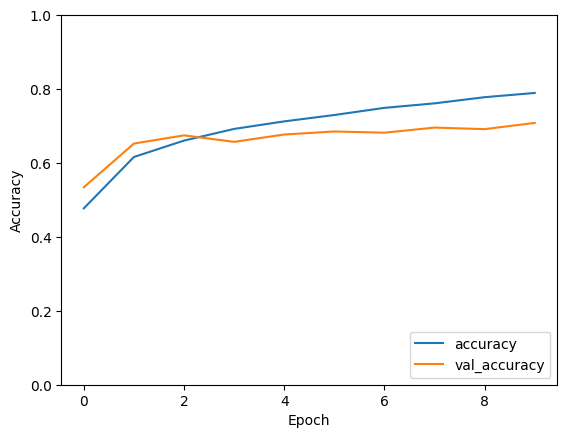

In [8]:
# Visualize the model training

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
